# Pós-graduação Lato Sensu em Ciência de Dados e Big Data - PUC MG

## TCC turma 2020 - Gabriel Fonseca da Silva


### Objetivo: desenvolver um algoritmo de machine learning para prever a aprovação de um candidato na prova  do ENCCEJA 2019 para obtenção do certificado do ensino fundamental

## Dados utilizados:

### a) Microdados do ENCCEJA Nacional Regular 2019 dos inscritos que fizeram as provas do ensino fundamental

##### https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/encceja

### b) Dados de homicídios por UF do ano de 2019 extraídos do DATASUS (grupo CID10 X85-Y09 e Y35-Y36)
#### http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/ext10uf.def

### c) População por UF estimada extraída do DATASUS (estimativas utilizadas pelo TCU)
#### http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/poptuf.def

### d) Índice de Desenvolvimeno Humano por Estado extraído do Atlas Brasil do IPEA
#### http://www.atlasbrasil.org.br/



## Aplicação: Naïve Bayes

### 1) Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

from joblib import dump, load
import os

import warnings
warnings.filterwarnings("ignore")

### 2) Carregando os dados transformados

In [2]:
# Importando os dados após a análise exploratória de dados

dados = pd.read_csv("05-dados_transformados\dados_arvore.csv", sep = ',', encoding = "ISO-8859-1")

print("\nDimensões: {0}".format(dados.shape))
print("\nCampos: {0}".format(dados.keys()))


Dimensões: (144757, 52)

Campos: Index(['genero_Feminino', 'moradia_pessoas_A-Até 3 pessoas',
       'moradia_tipo_A-Própria', 'moradia_local_B-Zona urbana',
       'escolaridade_pai_A-Não estudou/não sabe',
       'escolaridade_pai_B-Antigo primário',
       'escolaridade_pai_C-Antigo ginásio',
       'escolaridade_pai_D-Médio/Superior/especialização',
       'escolaridade_mae_A-Não estudou/não sabe',
       'escolaridade_mae_B-Antigo primário',
       'escolaridade_mae_C-Antigo ginásio',
       'escolaridade_mae_D-Médio/Superior/especialização',
       'renda_propria_A-Nenhuma renda', 'renda_propria_B-Até 1 SM',
       'renda_propria_C-Mais de 1 SM', 'trabalha_A-Sim',
       'reprovou_A-Nenhuma vez', 'reprovou_B-Uma vez', 'reprovou_C-Duas vezes',
       'reprovou_D-Três vezes ou mais', 'motivo_estudo_A-Conseguir um emprego',
       'motivo_estudo_B-Conseguir um emprego melhor',
       'motivo_estudo_C-Adquirir conhecimento', 'motivo_estudo_D-Outro motivo',
       'serie_estudo_A-4ª 

#### 2.1) Separando o target

In [3]:
# Separando os atributos e o target

## Número de atributos 

k=dados.shape[1]-1


## Selecionando os atributos

X0 = dados.iloc[:,0:k]


# Selecionando o target

y0 = dados.iloc[:,k]


# Visualizando o nome dos atributos

print("\nDimensões: {0}".format(X0.shape))
print('Nomes dos atributos de X: ')
print("\nCampos: {0}".format(X0.keys()))


Dimensões: (144757, 51)
Nomes dos atributos de X: 

Campos: Index(['genero_Feminino', 'moradia_pessoas_A-Até 3 pessoas',
       'moradia_tipo_A-Própria', 'moradia_local_B-Zona urbana',
       'escolaridade_pai_A-Não estudou/não sabe',
       'escolaridade_pai_B-Antigo primário',
       'escolaridade_pai_C-Antigo ginásio',
       'escolaridade_pai_D-Médio/Superior/especialização',
       'escolaridade_mae_A-Não estudou/não sabe',
       'escolaridade_mae_B-Antigo primário',
       'escolaridade_mae_C-Antigo ginásio',
       'escolaridade_mae_D-Médio/Superior/especialização',
       'renda_propria_A-Nenhuma renda', 'renda_propria_B-Até 1 SM',
       'renda_propria_C-Mais de 1 SM', 'trabalha_A-Sim',
       'reprovou_A-Nenhuma vez', 'reprovou_B-Uma vez', 'reprovou_C-Duas vezes',
       'reprovou_D-Três vezes ou mais', 'motivo_estudo_A-Conseguir um emprego',
       'motivo_estudo_B-Conseguir um emprego melhor',
       'motivo_estudo_C-Adquirir conhecimento', 'motivo_estudo_D-Outro motivo',

#### 2.2) Separando dados em treino e teste

In [4]:
# Criando os conjuntos de dados de treino e de teste

seed = 7

X_treino, X_teste, y_treino, y_teste = train_test_split(X0, y0, test_size = 0.30, random_state = seed)

print("\nDimensões: {0}".format(X_treino.shape))
print("\nDimensões: {0}".format(y_treino.shape))
print("\nDimensões: {0}".format(X_teste.shape))
print("\nDimensões: {0}".format(y_teste.shape))


Dimensões: (101329, 51)

Dimensões: (101329,)

Dimensões: (43428, 51)

Dimensões: (43428,)


### 3) Indução do modelo Naive Bayes


 Número de erros de classificação 
 17444 de 43428
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     24404
           1       0.54      0.58      0.56     19024

    accuracy                           0.60     43428
   macro avg       0.60      0.60      0.60     43428
weighted avg       0.60      0.60      0.60     43428

              Aprovado(prev)=Não  Aprovado(prev)=Sim
Aprovado=Não               14861                9543
Aprovado=Sim                7901               11123

 Acurácia: 
 0.5983236621534493

 Área abaixo da curva - AUC: 0.5968


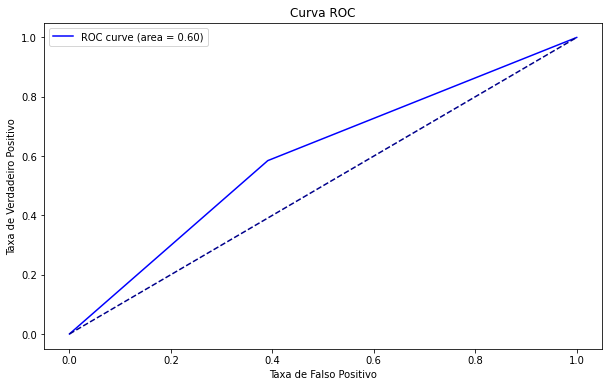

In [5]:
# indução do modelo


naive_bayes = BernoulliNB()
y_pred = naive_bayes.fit(X_treino, y_treino).predict(X_teste)

print("\n Número de erros de classificação \n {0} de {1}"
      .format((y_teste != y_pred).sum(), X_teste.shape[0]))

ac = naive_bayes.score(X_teste, y_teste)


print(classification_report(y_teste, y_pred))
cnf_matrix = confusion_matrix(y_teste, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Aprovado=Não", "Aprovado=Sim"], 
                         columns=["Aprovado(prev)=Não", "Aprovado(prev)=Sim"])
print(cnf_table)

print("\n Acurácia: \n", accuracy_score(y_teste, y_pred))


# Curva ROC

print('\n Área abaixo da curva - AUC: %0.4f' % roc_auc_score(y_teste, y_pred))

def plot_roc_curve(y_teste, y_pred, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_teste, y_pred)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_teste, y_pred)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
plot_roc_curve(y_teste, y_pred)    
 

### 4) Salvando o modelo gerado

In [6]:
# Alterando o diretório dos dados

os.chdir("06-modelos")


# Salvando o modelo Naive Bayes

dump(naive_bayes, 'modelo_naivebayes.joblib')

['modelo_naivebayes.joblib']